# Bank Statement Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_excel(r"C:\Users\lenovo\Downloads\DS-Assignment Dataset and instructions\DS-Assignment Dataset and instructions\P1- BankStatements (2) - Copy.xlsx")
data.head()

,type,mode,amount,currentBalance,transactionTimestamp,valueDate,txnId,narration,reference
0,DEBIT,CARD,100.0,2180.8,2023-06-27T09:40:19+05:30,2023-06-27,S39488701,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NaN
1,DEBIT,CARD,170.0,2010.8,2023-06-28T09:51:57+05:30,2023-06-28,S76862822,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NaN
2,DEBIT,CARD,500.0,1510.8,2023-07-26T10:04:00+05:30,2023-07-26,S31451661,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NaN
3,CREDIT,OTHERS,15.0,1525.8,2023-08-06T11:10:38+05:30,2023-07-31,S66463256,51888100006461IntPd01-05-2023 to 31-07-2023,NaN
4,DEBIT,ATM,1000.0,525.8,2023-08-07T17:13:13+05:30,2023-08-07,S18475743,ATM/CASH/321917012791/XXXXXXXXXXXX8896,NaN


In [3]:
data.dtypes

type                     object
mode                     object
amount                  float64
currentBalance          float64
transactionTimestamp     object
valueDate                object
txnId                    object
narration                object
reference               float64
dtype: object

In [4]:
data.shape

(985, 9)

# Transaction Analysis

- What is the total number of transactions made over the year?

In [5]:
data["valueDate"] = pd.to_datetime(data["valueDate"])
data["transactionTimestamp"] = pd.to_datetime(data["transactionTimestamp"])

In [6]:
data["year"] = data["valueDate"].dt.year

In [7]:
no_of_trans = data.groupby("year").size()

In [8]:
no_of_trans

year
2023    431
2024    554
dtype: int64

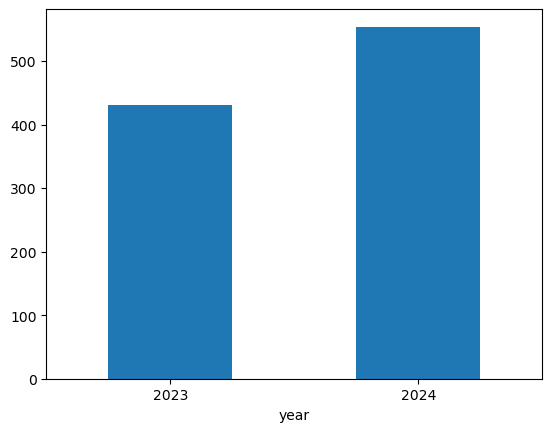

In [9]:
no_of_trans.plot(kind="bar")
plt.xticks(rotation=0)
plt.show()

   - What is the distribution of transaction amounts (e.g., small vs. large transactions)?(define small and large transactions by yourself)

In [10]:
data["amount"].mean()

855.4928020304571

- let transactions amaount < 850 be "Small"
- let transactions amaount >= 850 be "Large"

In [11]:
small_trans = data[data["amount"] < 850]["amount"].count()
large_trans = data[data["amount"] >= 850]["amount"].count()

In [12]:
print("Number of small transactions:", small_trans)
print("Number of large transactions:", large_trans)

Number of small transactions: 802
Number of large transactions: 183


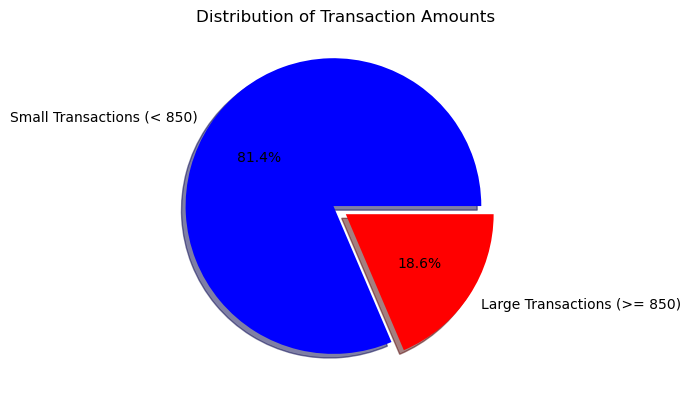

In [13]:
labels = ['Small Transactions (< 850)', 'Large Transactions (>= 850)']
sizes = [small_trans, large_trans]
colors = ['blue', 'red']
explode = (0.1, 0) 

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title('Distribution of Transaction Amounts')
plt.show()

   - Analyze the frequency of different transaction types (debit vs. credit).

In [14]:
type_counts = data['type'].value_counts()
type_counts

DEBIT     695
CREDIT    290
Name: type, dtype: int64

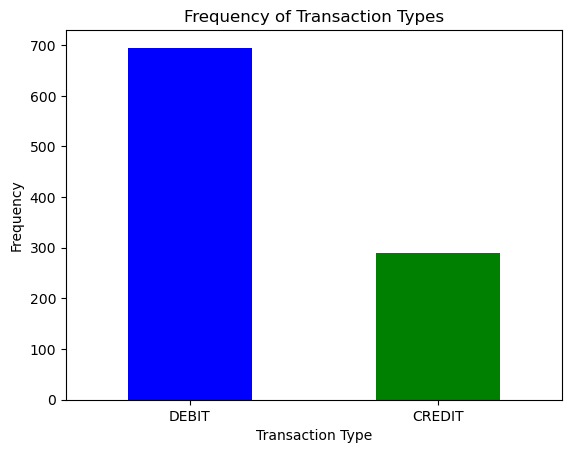

In [15]:
type_counts.plot(kind='bar', color=['blue', 'green'])
plt.title('Frequency of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

# Balance Analysis

   - What is the trend of the account balance over time?

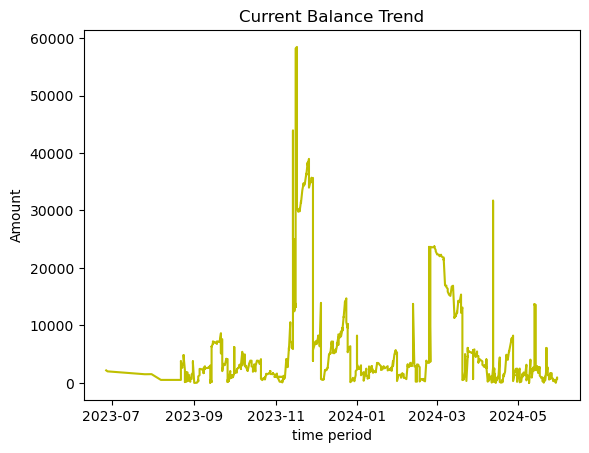

In [16]:
plt.plot(data["valueDate"], data["currentBalance"] , color='y')
plt.title("Current Balance Trend")
plt.xlabel("time period")
plt.ylabel("Amount")
plt.show()

The current balance trend shows significant fluctuations, characterized by a sharp increase in November 2023 followed by a pronounced decrease in December 2023.

# Spending Patterns

- What are the main categories of expenses (e.g., fuel, Ecommerce, food, shopping, ATM withdrawals, UPI transactions)?

In [17]:
data.groupby("type")["mode"].value_counts()

type    mode  
CREDIT  OTHERS    188
        UPI       101
        CASH        1
DEBIT   UPI       688
        CARD        4
        ATM         3
Name: mode, dtype: int64

In [18]:
spending = data[data["type"] == "DEBIT"].groupby(["type","mode"]).size()

In [19]:
spending

type   mode
DEBIT  ATM       3
       CARD      4
       UPI     688
dtype: int64

In [20]:
type(spending)

pandas.core.series.Series

  - Analyze the frequency and amount of spending in each category.

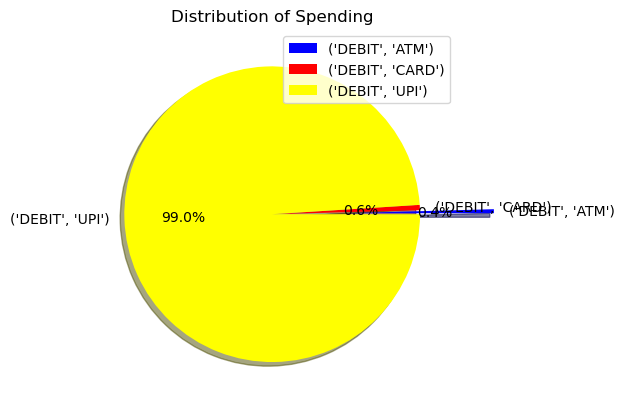

In [21]:
colors = ['blue', 'red','yellow']
explode = (0.5,0,0)

plt.pie(spending, colors=colors,explode =explode, autopct='%1.1f%%', shadow=True,labels=spending.keys())
plt.title('Distribution of Spending')
plt.legend()
plt.show()


- UPI is the most commonly used method for spending

# Income Analysis

- What are the main sources of income (e.g., salary, UPI credits)?


In [22]:
Income = data[data["type"] == "CREDIT"].groupby("mode").size()

In [23]:
Income

mode
CASH        1
OTHERS    188
UPI       101
dtype: int64

- Identify any patterns in the timing and amount of income received.

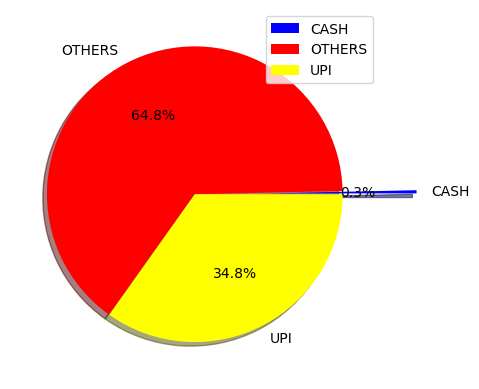

In [24]:
plt.pie(Income ,colors=colors ,explode = explode ,autopct = "%1.1f%%" ,shadow = True ,labels = Income.keys())
plt.legend()
plt.show()

- Only 0.3% of the total payments received are cash Payments 

# Alert Generation 



   - Generate alerts for low balance or high expenditure periods.


In [25]:
low_bal_threshold = 10
low_bal_alerts = data[data["amount"] < low_bal_threshold]
low_bal_alerts = low_bal_alerts[["amount","type","mode","currentBalance","valueDate"]]

In [26]:
print("Low Balance Alerts:")
print(low_bal_alerts)

Low Balance Alerts:
     amount    type    mode  currentBalance  valueDate
5       1.0   DEBIT     UPI          524.80 2023-08-22
21      1.0  CREDIT  OTHERS         1155.80 2023-08-25
22      1.0   DEBIT     UPI         1154.80 2023-08-25
23      1.0   DEBIT     UPI         1153.80 2023-08-25
25      1.0  CREDIT  OTHERS         1175.80 2023-08-25
29      1.0   DEBIT     UPI          195.80 2023-08-26
35      1.0   DEBIT     UPI         1814.80 2023-08-27
64      1.0   DEBIT     UPI         2898.80 2023-09-09
95      1.0  CREDIT     UPI         5151.80 2023-09-21
114     1.0   DEBIT     UPI         4153.80 2023-09-26
137     1.0   DEBIT     UPI         6237.80 2023-10-01
175     5.0   DEBIT     UPI         2958.80 2023-10-10
226     2.0  CREDIT  OTHERS         1547.80 2023-10-30
273     1.0  CREDIT     UPI         5892.80 2023-11-14
274     1.0  CREDIT     UPI         5893.80 2023-11-14
276     1.0   DEBIT     UPI        43891.80 2023-11-14
284     1.0   DEBIT     UPI        22970.80 2

In [27]:
high_bal_threshold = 15000
high_bal_alerts = data[data["amount"] > high_bal_threshold]
high_bal_alerts = high_bal_alerts[["amount","type","mode","currentBalance","valueDate"]]

In [28]:
print("High Balance Alerts:")
print(high_bal_alerts)

High Balance Alerts:
      amount    type  mode  currentBalance  valueDate
275  37999.0  CREDIT   UPI        43892.80 2023-11-14
277  16500.0   DEBIT   UPI        27391.80 2023-11-14
291  45000.0  CREDIT  CASH        58180.80 2023-11-16
295  21000.0   DEBIT   UPI        35400.80 2023-11-17
332  19000.0   DEBIT   UPI        16625.80 2023-11-29
570  20000.0  CREDIT   UPI        23483.91 2024-02-24
572  20000.0   DEBIT   UPI         3683.91 2024-02-25
576  20000.0  CREDIT   UPI        23664.91 2024-02-25
743  30000.0  CREDIT   UPI        31701.21 2024-04-12
744  30000.0   DEBIT   UPI         1701.21 2024-04-12


   - Identify any unusual or suspicious transactions.

In [29]:
susp_threshold = 25000
susp_alerts = data[data["amount"] > susp_threshold]
susp_alerts = susp_alerts[["amount","type","mode","currentBalance","valueDate"]]

In [30]:
print("Suspicious Transactions:")
print(susp_alerts)

Suspicious Transactions:
      amount    type  mode  currentBalance  valueDate
275  37999.0  CREDIT   UPI        43892.80 2023-11-14
291  45000.0  CREDIT  CASH        58180.80 2023-11-16
743  30000.0  CREDIT   UPI        31701.21 2024-04-12
744  30000.0   DEBIT   UPI         1701.21 2024-04-12
